Reference : https://nbviewer.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%201%20-%20Linear%20Regression.ipynb

Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
# sns.set_context('notebook')
# sns.set_style('white')

Load Data in text file to numpy as a m x n matrix

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [2]:
my_data = np.loadtxt("../coursera_ex_1/ex1data1.txt", delimiter=",")
my_population_of_city = np.c_[np.ones(my_data.shape[0]), my_data[:,0]]
my_profits_from_trucks = np.c_[my_data[:,1]]

Plot Data in scatter plot

Text(0, 0.5, 'Profit from Trucks')

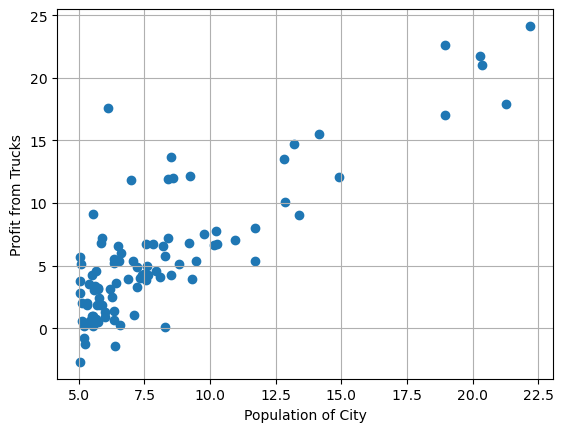

In [3]:
plt.scatter(x=my_population_of_city[:,1], y=my_profits_from_trucks)
# plt.xlim(0,40)
# plt.ylim(0,40)
plt.grid(True)
plt.xlabel('Population of City')
plt.ylabel('Profit from Trucks')

In [4]:
def computeCost(X, y,theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

In [5]:
computeCost(my_population_of_city,my_profits_from_trucks)

32.072733877455676

In [6]:
def gradientDescent(X, y):
    theta=[[0],[0]]
    alpha=0.01
    num_iters=1500
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        error_matrix = h-y
        theta = theta - alpha*(1/m)*(X.T.dot(error_matrix))
        J_history[iter] = computeCost(X, y, theta)
    print(error_matrix.T.dot(X))
    return(theta, J_history)

[[ 4.65051348 -0.46719452]]
theta:  [-3.63029144  1.16636235]


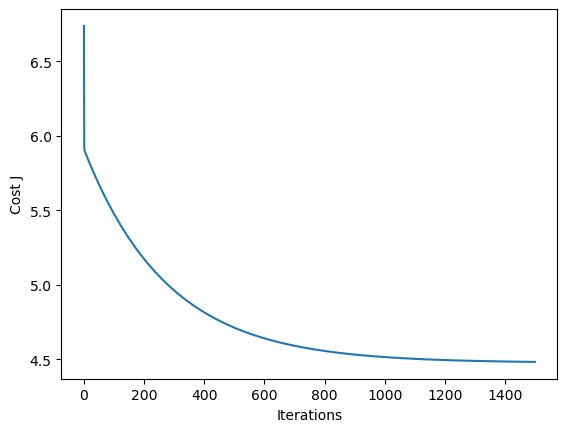

In [7]:
theta , Cost_J = gradientDescent(my_population_of_city, my_profits_from_trucks)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

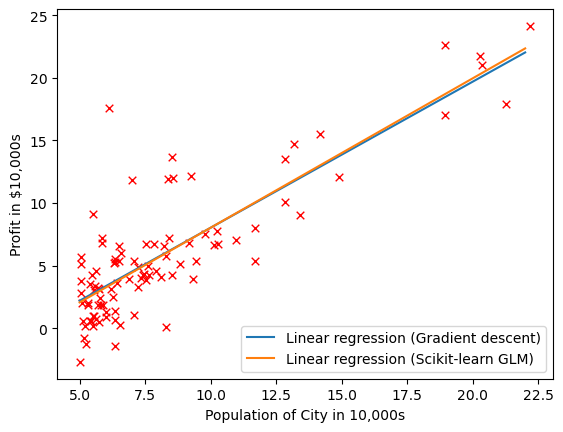

In [8]:


xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx
# print(xx)
# print(yy)

# Plot gradient descent
plt.scatter(my_population_of_city[:,1], my_profits_from_trucks, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(my_population_of_city[:,1].reshape(-1,1), my_profits_from_trucks.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)


# print(my_population_of_city[:,1].reshape(-1,1))


Predict Profit

In [9]:


# Predict profit for a city with population of 35000 and 70000


print(theta.T.dot([1, 3.5])*10000, theta.T.dot([1, 7])*10000, theta.T.dot([1, 10])*10000, theta.T.dot([1, 20])*10000, theta.T.dot([1, 30])*10000)
print(regr.predict([[3.5]])*10000,regr.predict([[7]])*10000, regr.predict([[10]])*10000, regr.predict([[20]])*10000, regr.predict([[30]])*10000)



[4519.7678677] [45342.45012945] [80333.32063951] [196969.55567307] [313605.79070663]
[2798.36876352] [44554.54631015] [80345.55563584] [199648.9200548] [318952.28447376]


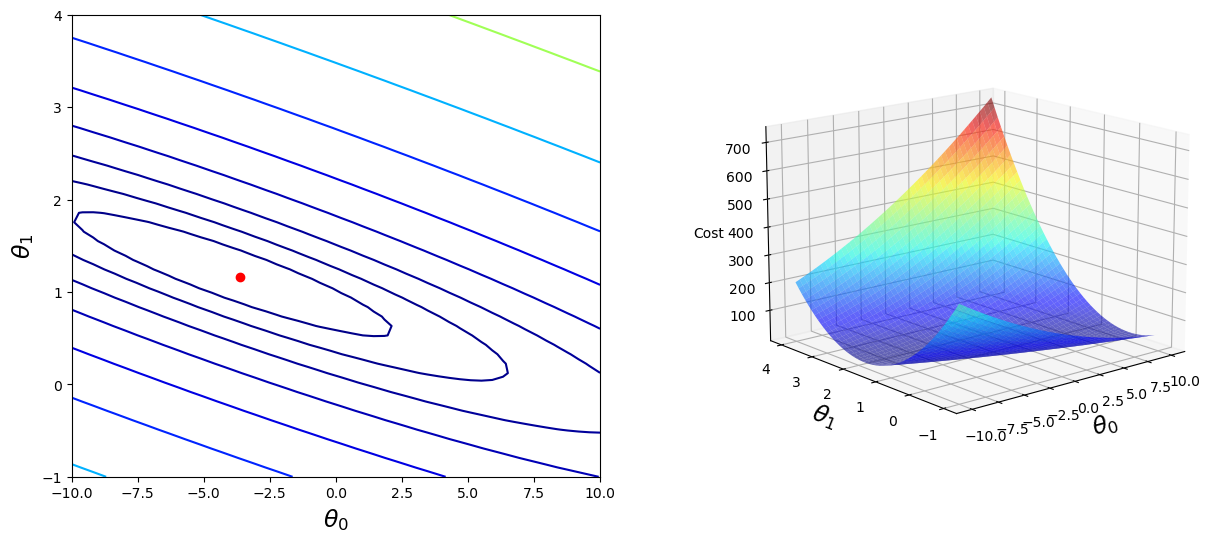

In [10]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))
# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(my_population_of_city, my_profits_from_trucks, theta=[[xx[i,j]], [yy[i,j]]])


fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')


# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)

# this is the minimized theta
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)


# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)